# Analise de dados

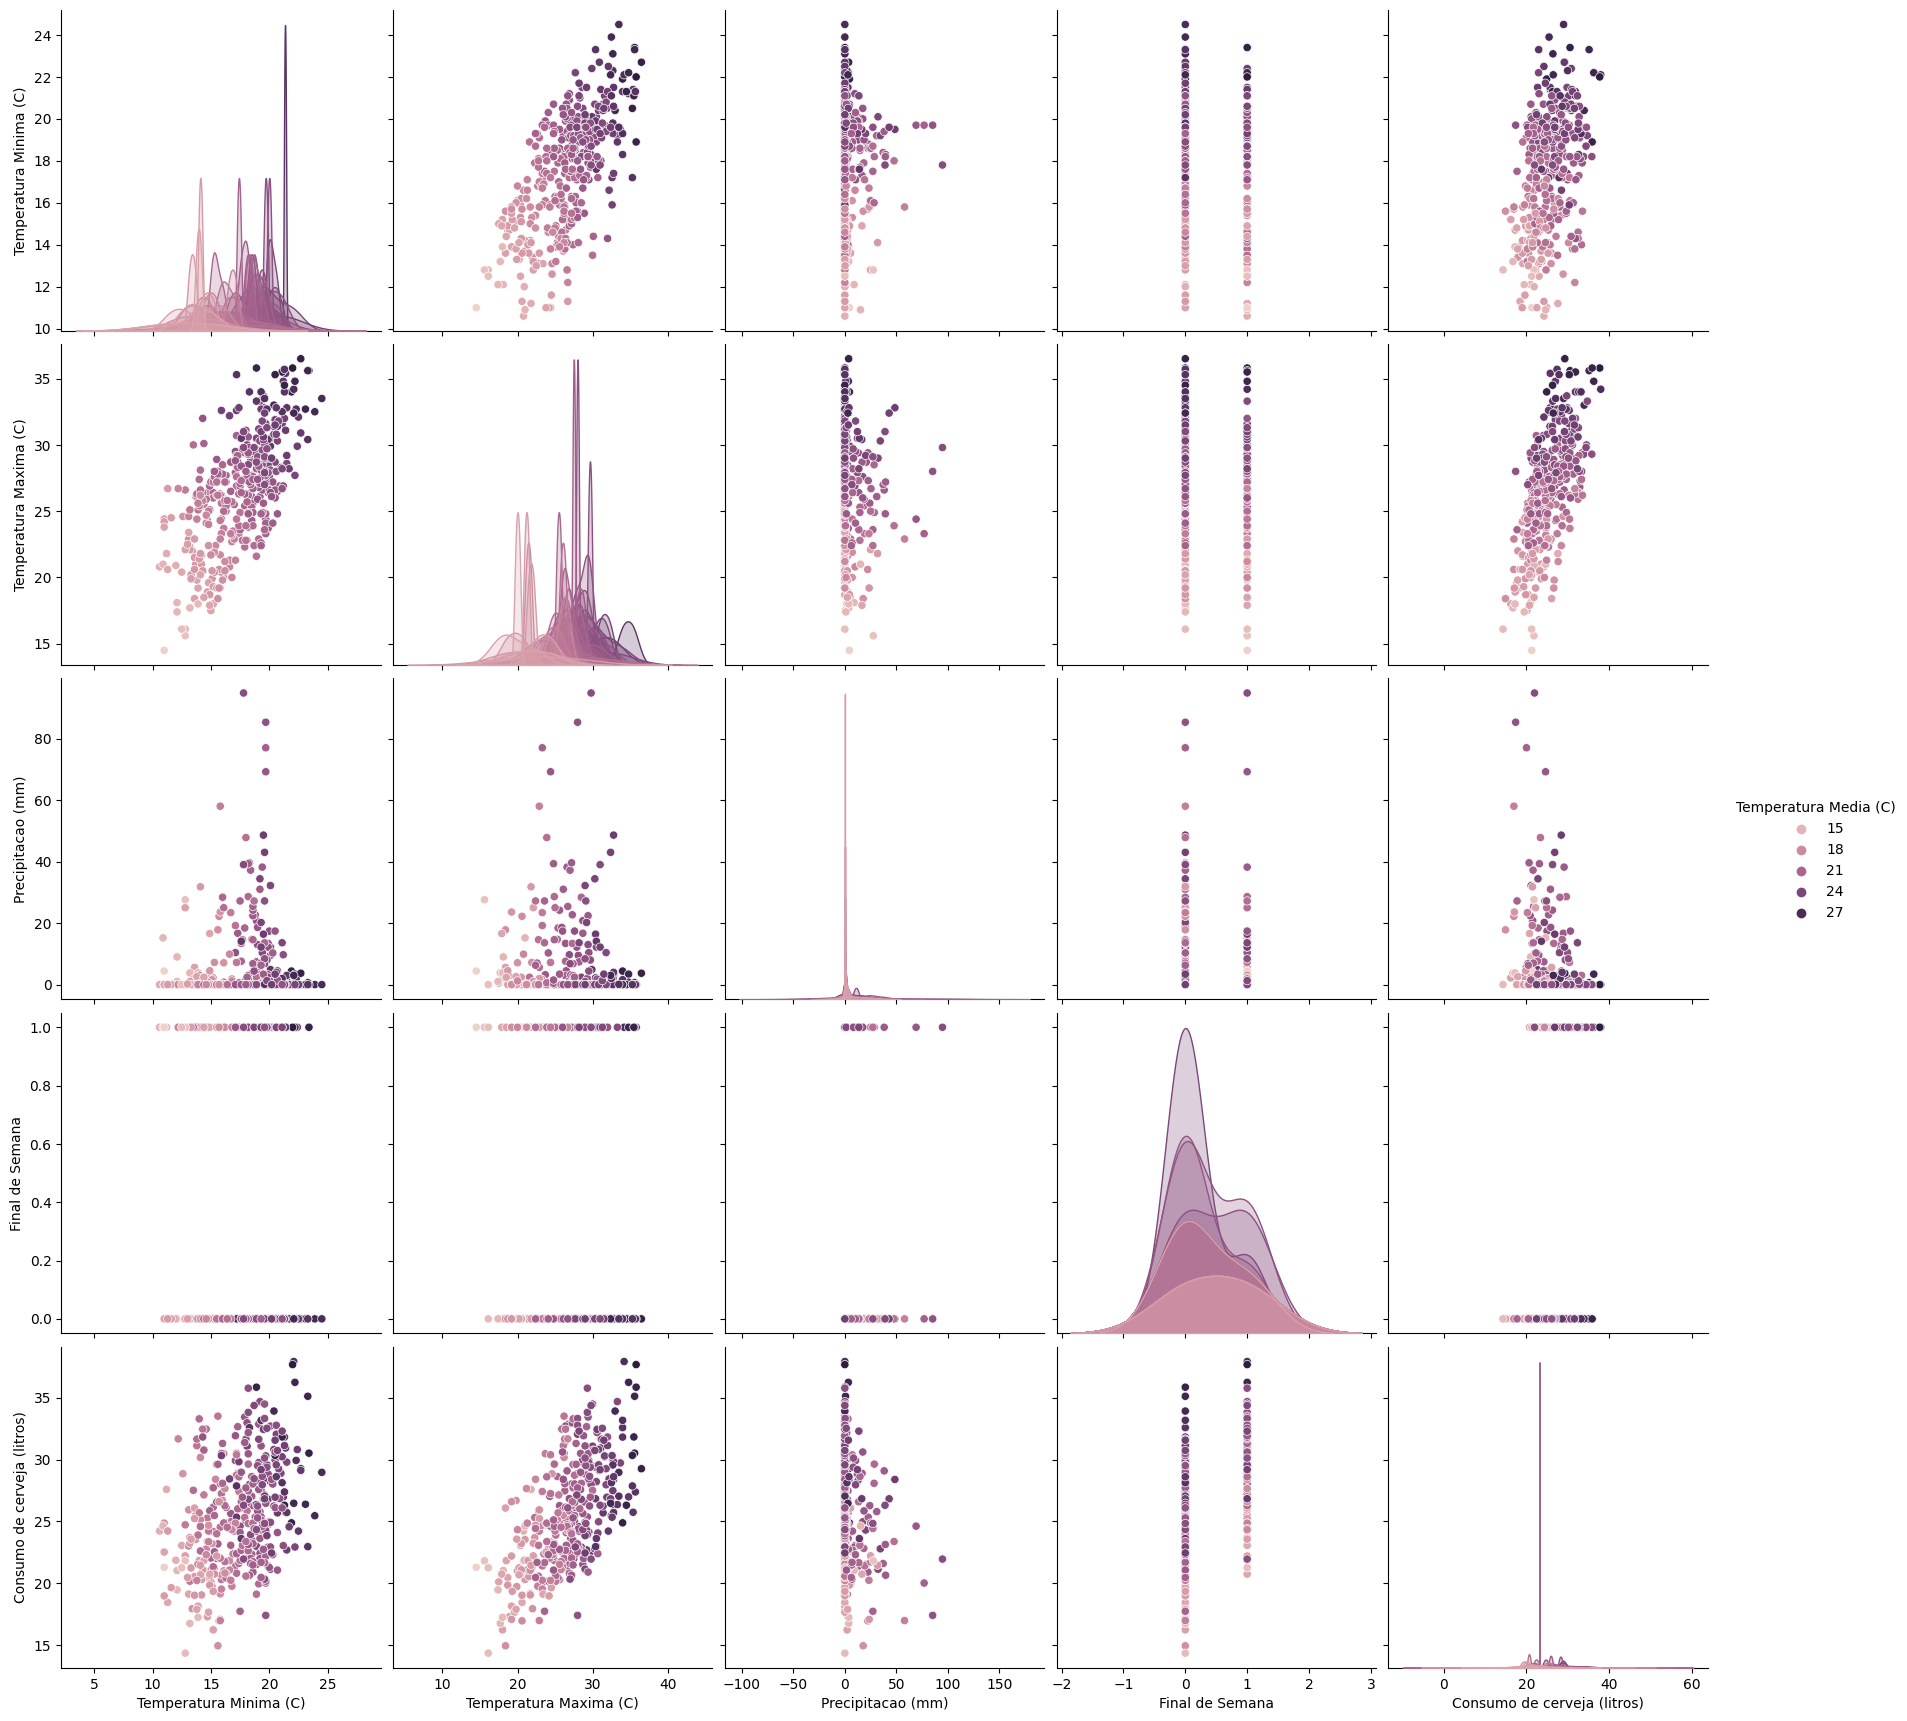

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Consumo_cerveja_corrigido.csv', sep=',', index_col=None)

temperatura_media = dataset['Temperatura Media (C)']
consumo = dataset['Consumo de cerveja (litros)']
fds = dataset['Final de Semana']

sns.pairplot(dataset, hue='Temperatura Media (C)', height=3.5)

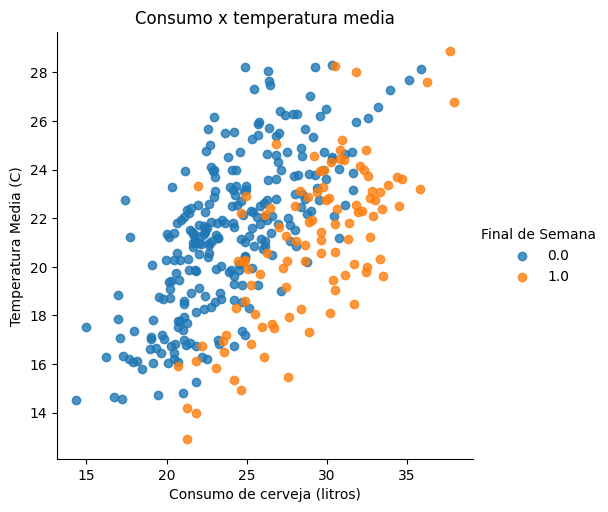

In [3]:
sns.lmplot(x='Consumo de cerveja (litros)', y='Temperatura Media (C)', data=dataset,
           fit_reg=False,
           hue='Final de Semana')

# cria um título para o gráfico
plt.title('Consumo x temperatura media')

# mostra o gráfico
plt.show()



Matriz de correlação: 


<ipython-input-4-9b2aea35431b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dataset.corr()


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


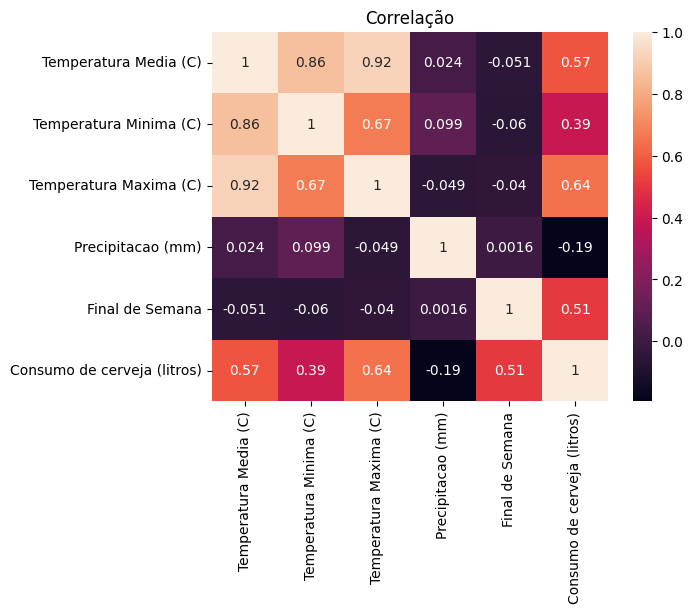

In [4]:
correlacao = dataset.corr()
print('\n\nMatriz de correlação: ')
display(correlacao)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(correlacao, annot=True,
        xticklabels=correlacao.columns,
        yticklabels=correlacao.columns)

plt.title('Correlação')
plt.show()

# Pré Processamento


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Consumo_cerveja_corrigido.csv', sep=',', index_col=None)

display(dataset.head(n=5))
display(dataset.describe())

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [6]:
dataset[['Temperatura Media (C)', 'Consumo de cerveja (litros)']].groupby(['Temperatura Media (C)'], as_index=False).mean().sort_values(by='Consumo de cerveja (litros)', ascending=False)

,Temperatura Media (C),Consumo de cerveja (litros)
261,26.76,37.937
276,28.86,37.690
266,27.62,36.254
271,28.12,35.861
196,23.18,35.781
...,...,...
37,17.08,17.075
72,18.82,16.977
53,17.86,16.956
5,14.66,16.748


In [7]:
dataset[['Final de Semana', 'Consumo de cerveja (litros)']].groupby(['Final de Semana'], as_index=False).mean().sort_values(by='Consumo de cerveja (litros)', ascending=False)

,Final de Semana,Consumo de cerveja (litros)
1,1.0,28.922721
0,0.0,23.998222


In [8]:
dataset[['Precipitacao (mm)', 'Consumo de cerveja (litros)']].groupby(['Precipitacao (mm)'], as_index=False).mean().sort_values(by='Consumo de cerveja (litros)', ascending=False)

,Precipitacao (mm),Consumo de cerveja (litros)
3,0.3,33.1010
10,1.3,32.5360
22,3.4,30.1890
39,8.4,30.1270
75,28.6,29.6370
...,...,...
68,23.6,17.0750
25,3.8,16.9945
88,58.0,16.9770
64,22.2,16.9560


Remover as colunas de temperatura minima e maxima

In [9]:
dataset_removed = dataset.drop(columns=['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Data'])
#dataset_removed.shape
dataset_removed.head(n=5)

,Temperatura Media (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,0.0,0.0,25.461
1,27.02,0.0,0.0,28.972
2,24.82,0.0,1.0,30.814
3,23.98,1.2,1.0,29.799
4,23.82,0.0,0.0,28.900


In [10]:
dataset_removed.isna().sum() / dataset_removed.shape[0]

Temperatura Media (C)          0.612115
Precipitacao (mm)              0.612115
Final de Semana                0.612115
Consumo de cerveja (litros)    0.612115
dtype: float64

In [11]:
#remover colunas com valores vazios
df_dropna = dataset_removed.dropna(subset = ['Consumo de cerveja (litros)'])
df_dropna.shape

(365, 4)

In [12]:
dataset_removed.isna().sum() / dataset_removed.shape[0]

Temperatura Media (C)          0.612115
Precipitacao (mm)              0.612115
Final de Semana                0.612115
Consumo de cerveja (litros)    0.612115
dtype: float64

In [13]:
dataset_removed.head(n=5)

,Temperatura Media (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,0.0,0.0,25.461
1,27.02,0.0,0.0,28.972
2,24.82,0.0,1.0,30.814
3,23.98,1.2,1.0,29.799
4,23.82,0.0,0.0,28.900


In [14]:
target = 'Consumo de cerveja (litros)'
X_columns = df_dropna.columns.tolist()
X_columns.remove(target)

X = df_dropna[X_columns]
y = df_dropna[target]

display(X.shape)
display(y.shape)

(365, 3)

(365,)

## Regresao Linear

Epoch 1/40
8/8 [==============================] - 1s 24ms/step - loss: 25.2210 - val_loss: 24.1964
Epoch 2/40
8/8 [==============================] - 0s 8ms/step - loss: 24.4045 - val_loss: 23.4028
Epoch 3/40
8/8 [==============================] - 0s 8ms/step - loss: 23.6012 - val_loss: 22.6004
Epoch 4/40
8/8 [==============================] - 0s 6ms/step - loss: 22.7999 - val_loss: 21.8034
Epoch 5/40
8/8 [==============================] - 0s 8ms/step - loss: 22.0031 - val_loss: 20.9974
Epoch 6/40
8/8 [==============================] - 0s 6ms/step - loss: 21.2026 - val_loss: 20.1980
Epoch 7/40
8/8 [==============================] - 0s 8ms/step - loss: 20.4013 - val_loss: 19.3951
Epoch 8/40
8/8 [==============================] - 0s 9ms/step - loss: 19.6026 - val_loss: 18.6014
Epoch 9/40
8/8 [==============================] - 0s 8ms/step - loss: 18.7989 - val_loss: 17.8008
Epoch 10/40
8/8 [==============================] - 0s 6ms/step - loss: 17.9980 - val_loss: 17.0018
Epoch 11/40
8/8 [=

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


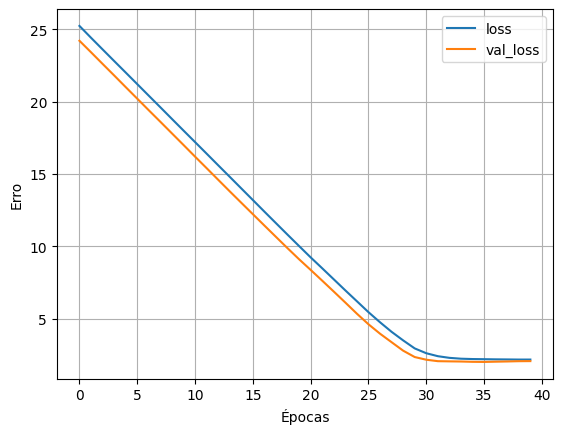

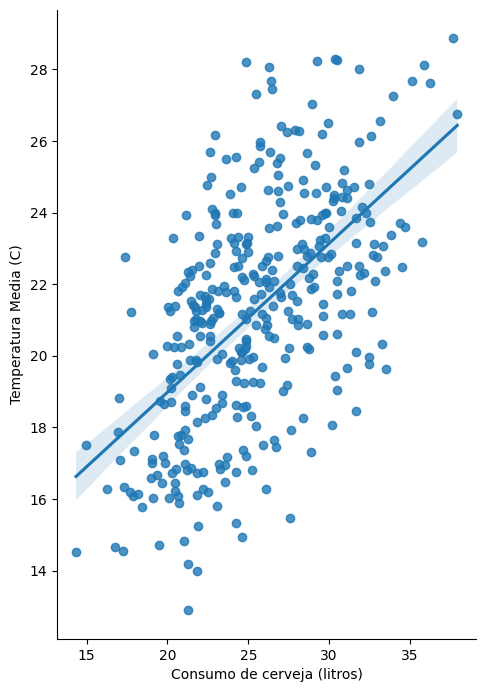

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=200)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

model = keras.Sequential([
    normalizer,
    layers.Dense(1)
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

# Faça previsões
history = model.fit(X_train, y_train,epochs=40, validation_data=(X_test, y_test))
plot_loss(history)

# Avalie o modelo
y_pred = model.predict(X_test)
print("MSE: " , mean_squared_error(y_test, y_pred))
print("R2: " , r2_score(y_test, y_pred))

sns.pairplot(df_dropna, x_vars=['Consumo de cerveja (litros)'],
             y_vars='Temperatura Media (C)', size=7, aspect=0.7, kind='reg')

# Visualize os resultados
#plt.scatter(y_test, y_pred)
#plt.xlabel('Valores Reais')
#plt.ylabel('Previsões')
#plt.title('Valores Reais vs. Previsões')
#plt.show()

##Rede Neural

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 3)                 7         
 tion)                                                           
                                                                 
 dense_12 (Dense)            (None, 10)                40        
                                                                 
 dense_13 (Dense)            (None, 7)                 77        
                                                                 
 dense_14 (Dense)            (None, 5)                 40        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 170 (684.00 Byte)
Trainable params: 163 (652.00 Byte)
Non-trainable params: 7 (32.00 Byte)
_______________

25.383821

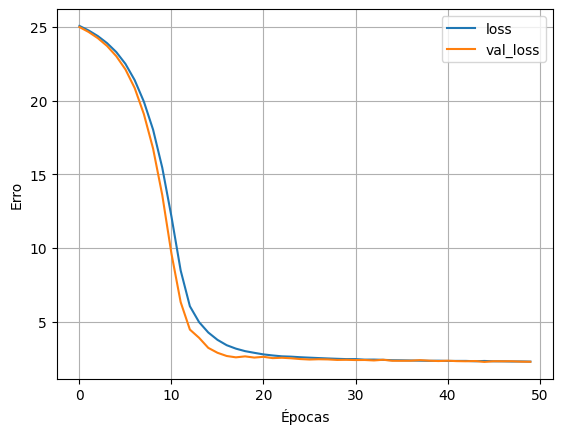

In [22]:
from sklearn.model_selection import train_test_split

features = df_dropna.columns.tolist()
features.remove(target)

X = df_dropna[features]

y = df_dropna[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

model = keras.Sequential([
    normalizer,
    layers.Dense(10),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

plot_loss(history)

y_pred = model.predict(X_test).reshape(-1)
print(y_pred)

model.evaluate(X_test, y_test)

y_test.mean()

y_pred.mean()